In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data_train = pd.read_csv("SalaryData_Train.csv")
raw_data_test = pd.read_csv("SalaryData_Test.csv")
raw_data_train.head() 

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train = raw_data_train.copy() #Changes we make in training data should be made to testing data as well
df_test = raw_data_test.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Feature Analysis

In [5]:
for x in range(1,len(df_train.columns)):
    print(df_train.iloc[:,x].value_counts())
    print('\n') 

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64


 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent   

In [6]:
for x in range(1,len(df_train.columns)):
    print(df_train.iloc[:,x].value_counts())
    print('\n') 

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64


 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent   

# Label Encoding

In [7]:
df_train.columns.values

array(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'], dtype=object)

In [8]:
from sklearn import preprocessing #Label Encoding
label_encoder = preprocessing.LabelEncoder()
df_train.education= label_encoder.fit_transform(df_train.education) 
df_train.maritalstatus= label_encoder.fit_transform(df_train.maritalstatus) 
df_train.workclass= label_encoder.fit_transform(df_train.workclass) 
df_train.occupation= label_encoder.fit_transform(df_train.occupation) 
df_train.relationship= label_encoder.fit_transform(df_train.relationship) 
df_train.race= label_encoder.fit_transform(df_train.race) 
df_train.sex= label_encoder.fit_transform(df_train.sex) 
df_train.native= label_encoder.fit_transform(df_train.native) 
df_train.Salary= label_encoder.fit_transform(df_train.Salary) 
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [9]:
label_encoder = preprocessing.LabelEncoder()
df_test.education= label_encoder.fit_transform(df_test.education) 
df_test.maritalstatus= label_encoder.fit_transform(df_test.maritalstatus) 
df_test.workclass= label_encoder.fit_transform(df_test.workclass) 
df_test.occupation= label_encoder.fit_transform(df_test.occupation) 
df_test.relationship= label_encoder.fit_transform(df_test.relationship) 
df_test.race= label_encoder.fit_transform(df_test.race) 
df_test.sex= label_encoder.fit_transform(df_test.sex) 
df_test.native= label_encoder.fit_transform(df_test.native) 
df_test.Salary= label_encoder.fit_transform(df_test.Salary) 

In [10]:
df_train.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

<AxesSubplot:>

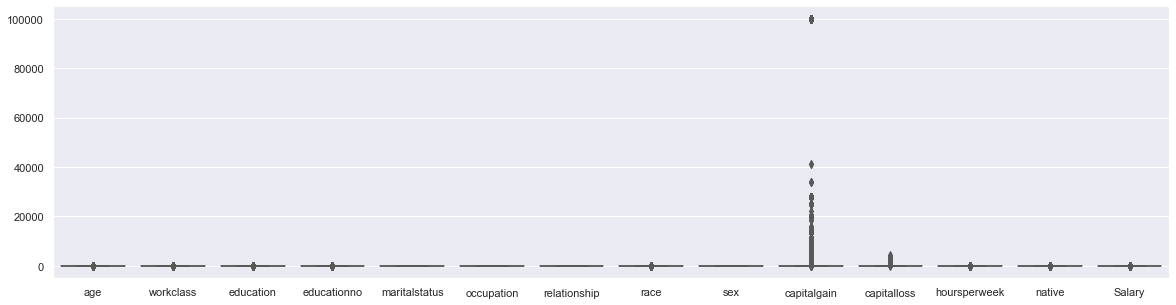

In [11]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=df_train, orient="v", palette="Set2") 

In [12]:
from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df_train.copy()

a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
m, n = smt.fit_resample(a, b)

print(Counter(n))

Counter({0: 22653, 1: 7508})
Counter({0: 22238, 1: 22238})


# Train | Split dataset

In [14]:
X_train =m
X_test = df_test.iloc[:,:-1]
y_train = n
y_test = df_test.iloc[:,-1] 

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [16]:
n_estimators = 10
model = OneVsRestClassifier(BaggingClassifier(LinearSVC(), max_samples=1.0 / n_estimators, n_estimators=n_estimators), n_jobs=-1)

In [17]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

OneVsRestClassifier(estimator=BaggingClassifier(estimator=LinearSVC(),
                                                max_samples=0.1),
                    n_jobs=-1)

# Model Evaluation Function

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
def report_model(model):
    model_preds = model.predict(X_test)
    print(confusion_matrix(y_test,model_preds))
    print(classification_report(y_test,model_preds))

In [20]:
report_model(model)

[[8809 2551]
 [1592 2108]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81     11360
           1       0.45      0.57      0.50      3700

    accuracy                           0.72     15060
   macro avg       0.65      0.67      0.66     15060
weighted avg       0.75      0.72      0.73     15060

